In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [19]:
df_data = pd.read_csv('CFPB-financial-wellness-data.csv')
df_data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [79]:
# separating the target from all the features

df_data.dropna(inplace = True)
X = df_data.drop(['PRODUSE_3','PRODUSE_6', 'PUF_ID','IMPUTATION_FLAG', 'finalwt'], axis = 1)
y = df_data['PRODUSE_3']

In [80]:
num_features = ['LIFEEXPECT', 'SOCSEC3', 'SOCSEC2', 'CONNECT', 'KHscore', 'LMscore', 'FSscore', 'FWBscore']

In [81]:
# creating dummy data 
X_cat = X.drop(columns = [num_features], errors = "ignore").astype('str')
X_numeric = X[num_features]

full_features = pd.concat([pd.get_dummies(X_cat), X_numeric], axis = 1)
full_features

,sample_1,sample_2,sample_3,fpl_1,fpl_2,fpl_3,SWB_1_-1,SWB_1_-4,SWB_1_1,SWB_1_2,...,PCTLT200FPL_0,PCTLT200FPL_1,LIFEEXPECT,SOCSEC3,SOCSEC2,CONNECT,KHscore,LMscore,FSscore,FWBscore
0,0,1,0,0,0,1,0,0,0,0,...,1,0,-2,-2,62,80,1.267,3,44,55
1,1,0,0,0,0,1,0,0,0,0,...,1,0,90,66,-2,95,-0.570,3,43,51
2,1,0,0,0,0,1,0,0,0,0,...,0,1,78,68,-2,50,-0.188,3,42,49
3,1,0,0,0,0,1,0,0,0,0,...,1,0,-1,-1,-2,-1,-1.485,2,42,49
4,1,0,0,0,0,1,0,0,0,0,...,0,1,75,65,-2,0,-1.900,1,42,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,1,0,0,1,0,0,0,0,...,0,0,100,-2,-2,50,1.267,3,47,61
6390,0,0,1,0,1,0,0,0,0,0,...,0,0,100,-2,-3,100,-1.215,1,59,59
6391,1,0,0,0,0,1,0,0,0,0,...,1,0,100,71,-2,50,-1.215,2,51,59
6392,1,0,0,0,0,1,0,0,0,0,...,1,0,20,68,-2,89,-1.215,2,54,46


In [82]:
selector = SelectKBest(f_classif, k = 20)

X_0 = selector.fit_transform(full_features, y)

X_f = pd.DataFrame(X_0, columns = full_features.columns[selector.get_support()])
#X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

features_selected = full_features.columns[selector.get_support()]
features_selected

Index(['fpl_1', 'fpl_3', 'HOUSING_1', 'VALUERANGES_-2', 'MORTGAGE_-2',
       'PRODHAVE_1_0', 'PRODHAVE_1_1', 'PRODHAVE_4_0', 'PRODHAVE_4_1',
       'SNAP_0', 'SNAP_1', 'MATHARDSHIP_1_1', 'MATHARDSHIP_2_1',
       'MATHARDSHIP_3_1', 'COLLECT_0', 'ABSORBSHOCK_4', 'PPETHM_1', 'CONNECT',
       'KHscore', 'LMscore'],
      dtype='object')

# Test 1: Random Forest

In [83]:
rf_rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 100)
rf_rfe_selector.fit(full_features, y) 

RFE(estimator=RandomForestClassifier(), n_features_to_select=20, step=100)

In [84]:
rf_feat_columns = full_features.columns[rf_rfe_selector.get_support()]
rf_feat_columns

Index(['fpl_1', 'FWB1_1_3', 'PROPPLAN_4_4', 'MANAGE1_1_5', 'PRODHAVE_1_0',
       'EARNERS_1', 'SNAP_1', 'MATHARDSHIP_1_1', 'SHOCKS_12_0',
       'SELFCONTROL_1_2', 'PPETHM_1', 'PPT18OV_2', 'LIFEEXPECT', 'SOCSEC3',
       'SOCSEC2', 'CONNECT', 'KHscore', 'LMscore', 'FSscore', 'FWBscore'],
      dtype='object')

In [85]:
target = y
features = full_features[rf_feat_columns]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [87]:
# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Best Params - RandomForestClassifier 
RF = RandomForestClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = RF, param_grid = search_grid, scoring = 'f1')


search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.017344553529686772


In [92]:
model = RandomForestClassifier(random_state=0, n_estimators=100)
results = model.fit(X_train_scaled,y_train)

y_pred_proba = results.predict_proba(X_test_scaled)[:,1]
y_pred = [ 0 if x < 0.155 else 1 for x in y_pred_proba]

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1168
           1       0.18      0.53      0.27       111

    accuracy                           0.76      1279
   macro avg       0.57      0.65      0.56      1279
weighted avg       0.88      0.76      0.80      1279



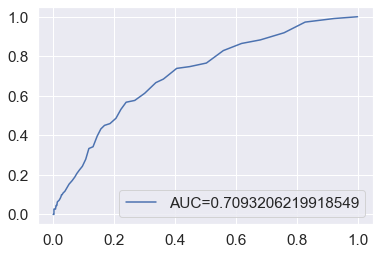

In [93]:
y_pred_proba = results.predict_proba(X_test_scaled)[:,1]
fpr, tpr, t = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

[[908 260]
 [ 52  59]]


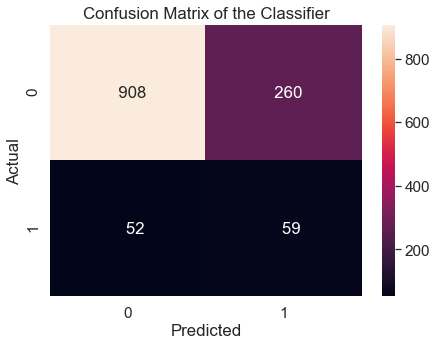

In [94]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'], index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(cf_df, annot=True, fmt='5.0f')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Test 2: Logistic Regression


## RFE

In [134]:
# Selecting the Best important features according to Logistic Regression

lr_rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 20, step = 100)
lr_rfe_selector.fit(full_features, y)

RFE(estimator=LogisticRegression(), n_features_to_select=20, step=100)

In [135]:
lr_feat_columns = full_features.columns[lr_rfe_selector.get_support()]
lr_feat_columns

Index(['FWBscore_29', 'FWBscore_34', 'FWBscore_79', 'FINGOALS_-1',
       'FRUGALITY_-1', 'KHKNOWL1_-1', 'HOUSING_-1', 'MORTGAGE_-1',
       'SAVINGSRANGES_-1', 'EARNERS_-1', 'FRAUD2_-1', 'CONNECT_15',
       'CONNECT_33', 'CONNECT_67', 'CONNECT_8', 'SOCSEC1_-1', 'SOCSEC3_-1',
       'LIFEEXPECT_8', 'LIFEEXPECT_87', 'EMPLOY_3'],
      dtype='object')

In [136]:
target = y
features = full_features[lr_feat_columns]
features

,FWBscore_29,FWBscore_34,FWBscore_79,FINGOALS_-1,FRUGALITY_-1,KHKNOWL1_-1,HOUSING_-1,MORTGAGE_-1,SAVINGSRANGES_-1,EARNERS_-1,FRAUD2_-1,CONNECT_15,CONNECT_33,CONNECT_67,CONNECT_8,SOCSEC1_-1,SOCSEC3_-1,LIFEEXPECT_8,LIFEEXPECT_87,EMPLOY_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [137]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.7 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

Optimization terminated successfully.
         Current function value: 0.677684
         Iterations 8

Model               Logistic Regression 
ROC AUC Score                   0.547691
Precision Score                   0.1875
Recall Score                    0.162162
Accuracy Score                  0.866302
F1 Score                        0.173913
dtype: object

[[1090   78]
 [  93   18]]
                Predicted group 0  Predicted group 1
Actual group 0               1090                 78
Actual group 1                 93                 18
 
 
              precision    recall  f1-score   support

           0      0.921     0.933     0.927      1168
           1      0.188     0.162     0.174       111

    accuracy                          0.866      1279
   macro avg      0.554     0.548     0.551      1279
weighted avg      0.858     0.866     0.862      1279

 
 
Accuracy score is
86.63 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[1090   78]
 [  93   18]]


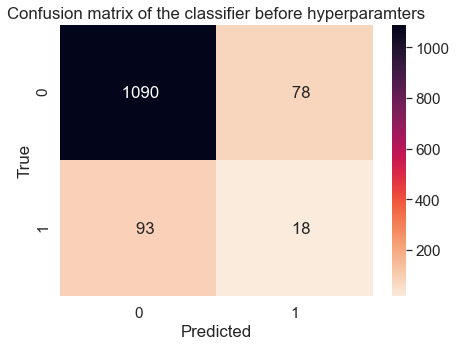

In [139]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

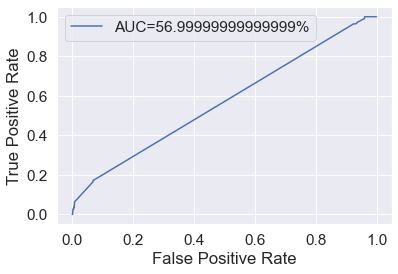

In [140]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### KBest

In [113]:
selector = SelectKBest(f_classif, k = 20)

X_0 = selector.fit_transform(full_features, y)

X_f = pd.DataFrame(X_0, columns = full_features.columns[selector.get_support()])
#X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

test2_features = full_features.columns[selector.get_support()]

In [114]:
target = y
features = full_features[test2_features]
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
print(prob_pred)

y_pred = [ 0 if x < 0.56 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

         Current function value: 0.680810
         Iterations: 35
[0.42337103 0.61489067 0.44743329 ... 0.5015681  0.55339973 0.57428517]

Model               Logistic Regression 
ROC AUC Score                    0.65667
Precision Score                 0.135802
Recall Score                    0.792793
Accuracy Score                  0.544175
F1 Score                        0.231884
dtype: object

[[608 560]
 [ 23  88]]
                Predicted group 0  Predicted group 1
Actual group 0                608                560
Actual group 1                 23                 88
 
 
              precision    recall  f1-score   support

           0      0.964     0.521     0.676      1168
           1      0.136     0.793     0.232       111

    accuracy                          0.544      1279
   macro avg      0.550     0.657     0.454      1279
weighted avg      0.892     0.544     0.637      1279

 
 
Accuracy score is
54.42 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[608 560]
 [ 23  88]]


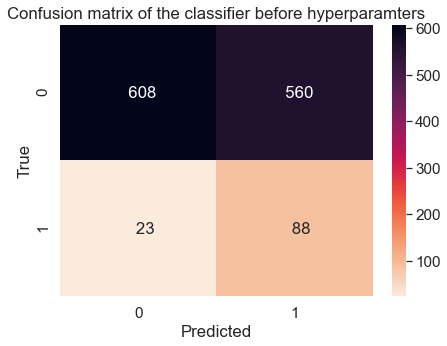

In [117]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

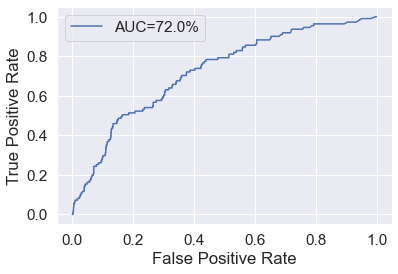

In [118]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Test 3 AdaBoost


In [119]:
ada_rfe_selector = RFE(estimator=AdaBoostClassifier(),n_features_to_select = 20, step = 100)
ada_rfe_selector.fit(full_features, y)
ada_features = full_features.columns[ada_rfe_selector.get_support()]

In [120]:
ada_features

Index(['FSscore_36', 'FSscore_44', 'FS1_4_3', 'FS1_6_2', 'ACT1_1_5',
       'FINGOALS_-1', 'PROPPLAN_2_5', 'PROPPLAN_4_4', 'SUBNUMERACY1_1',
       'KHKNOWL1_2', 'KHKNOWL3_1', 'KHKNOWL8_3', 'VALUERANGES_99',
       'MORTGAGE_-1', 'MORTGAGE_2', 'PRODHAVE_1_0', 'PRODHAVE_6_1',
       'MATHARDSHIP_1_1', 'PPETHM_1', 'FWBscore'],
      dtype='object')

In [121]:
target = y
features = full_features[ada_features]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:

# Best Params - AdaBoostClassifier 
ada= AdaBoostClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = ada, param_grid = search_grid, scoring = 'f1')

search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.06440620351519556


[0.41979486 0.5146147  0.56862874 ... 0.55862278 0.49289975 0.55634242]
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      1168
           1       0.15      0.57      0.24       111

    accuracy                           0.69      1279
   macro avg       0.55      0.64      0.52      1279
weighted avg       0.88      0.69      0.76      1279



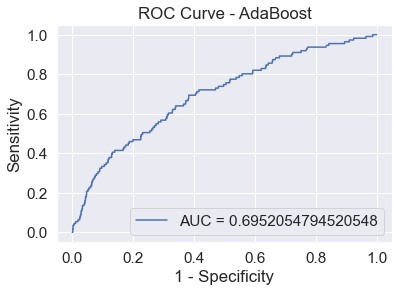

In [124]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
model.fit(X_train_scaled, y_train)

y_test_prob = results.predict(X_test_scaled)
print(y_test_prob)

y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
y_test_pred = [(x > .496) for x in y_test_ppred]

print(classification_report(y_test, y_test_pred))

from sklearn.metrics import roc_auc_score, roc_curve

fp, tp, t = roc_curve(y_test, y_test_ppred)
auc = roc_auc_score(y_test, y_test_ppred)
plt.plot(fp, tp, label = "AUC = " + str(auc))
plt.title("ROC Curve - AdaBoost")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

[[608 560]
 [ 23  88]]


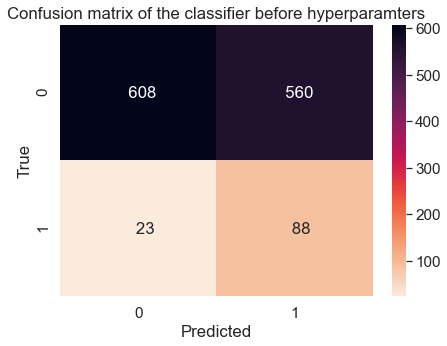

In [125]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
ada_rfe_selector.get_support()

# Testing Metrics w/ Varying Number of Features and Thresholds

## Random Forest

### Number of Features

In [127]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=RandomForestClassifier(),n_features_to_select = i, step = 100)
    rfe_test.fit(full_features, y)
    
    features = full_features[full_features.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < .15 else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('--------------------------')
    print(classification_report(y_test, y_pred))

Number of Features = 5
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1168
           1       0.15      0.41      0.22       111

    accuracy                           0.75      1279
   macro avg       0.54      0.60      0.54      1279
weighted avg       0.87      0.75      0.79      1279

Number of Features = 10
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1168
           1       0.17      0.51      0.25       111

    accuracy                           0.74      1279
   macro avg       0.56      0.64      0.55      1279
weighted avg       0.88      0.74      0.79      1279

Number of Features = 15
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1168
           1       0.18      0.51      0.26       111

    accuracy                  

### Threshold

In [132]:
for i in [.13, .145, .15, .155, .175, .2, .25]:

    features = full_features[full_features.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < i else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

threshold = 0.13
------------------
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1168
           1       0.18      0.60      0.27       111

    accuracy                           0.72      1279
   macro avg       0.56      0.67      0.55      1279
weighted avg       0.88      0.72      0.78      1279

threshold = 0.145
------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1168
           1       0.19      0.57      0.28       111

    accuracy                           0.75      1279
   macro avg       0.57      0.67      0.56      1279
weighted avg       0.88      0.75      0.80      1279

threshold = 0.15
------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1168
           1       0.19      0.57      0.28       111

    accuracy                           0.75      1279
   macro avg       

## Logistic Regression (RFE)

### Number of Features

In [141]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i, step = 100)
    rfe_test.fit(full_features, y)
    
    features = full_features[full_features.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.679271
         Iterations 7
threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      1168
           1       0.60      0.03      0.05       111

    accuracy                           0.91      1279
   macro avg       0.76      0.51      0.50      1279
weighted avg       0.89      0.91      0.88      1279

Optimization terminated successfully.
         Current function value: 0.678694
         Iterations 8
threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      1168
           1       0.60      0.03      0.05       111

    accuracy                           0.91      1279
   macro avg       0.76      0.51      0.50      1279
weighted avg       0.89      0.91      0.88      1279

Optimization terminated successfully.
         Current function value: 0.67

### Threshold

In [143]:
for i in [.6, .7, .8, .9]:
 
    features = full_features[full_features.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.677684
         Iterations 8

threshold = 0.6
------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      1168
           1       0.43      0.03      0.05       111

    accuracy                           0.91      1279
   macro avg       0.67      0.51      0.50      1279
weighted avg       0.87      0.91      0.88      1279

Optimization terminated successfully.
         Current function value: 0.677684
         Iterations 8

threshold = 0.7
------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      1168
           1       0.50      0.03      0.05       111

    accuracy                           0.91      1279
   macro avg       0.71      0.51      0.50      1279
weighted avg       0.88      0.91      0.88      1279

Optimization terminated successfully.
         Current function value:

## Logistic Regression (KBest)

### Number of Features

In [144]:
for i in range(5,21,5):
    selector = SelectKBest(f_classif, k = i)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.684510
         Iterations 4

threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1168
           1       0.14      0.63      0.23       111

    accuracy                           0.64      1279
   macro avg       0.54      0.63      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.682236
         Iterations 4

threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1168
           1       0.14      0.65      0.24       111

    accuracy                           0.64      1279
   macro avg       0.55      0.64      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.

### Threshold

In [145]:
for i in [.53, .54, .55, .56, .57]:
    selector = SelectKBest(f_classif, k = 20)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.53
------------------
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1168
           1       0.18      0.58      0.27       111

    accuracy                           0.73      1279
   macro avg       0.56      0.66      0.56      1279
weighted avg       0.88      0.73      0.79      1279

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.54
------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1168
           1       0.19      0.55      0.28       111

    accuracy                           0.75      1279
   macro avg       0.57      0.66      0.57      1279
weighted avg       0.88      0.75      0.80      1279

Optimization terminated successfully.
         Current function valu

## ADA

### Number of Features

In [149]:
for i in range(5,21,5):
    rfe_test = RFE(estimator=AdaBoostClassifier(),n_features_to_select = i, step = 100)
    rfe_test.fit(full_features, y)
    
    features = full_features[full_features.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    y_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)
    #print(results.summary())

    # Predict outcomes
    y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > .494) for x in y_test_ppred]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('-----------------------------')
    print(classification_report(y_test, y_test_pred))

#ValueError: X has 5 features, but DecisionTreeClassifier is expecting 20 features as input.

   

Number of Features = 5
-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1168
           1       0.13      0.46      0.20       111

    accuracy                           0.68      1279
   macro avg       0.53      0.58      0.50      1279
weighted avg       0.86      0.68      0.75      1279

Number of Features = 10
-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1168
           1       0.13      0.46      0.20       111

    accuracy                           0.68      1279
   macro avg       0.53      0.58      0.50      1279
weighted avg       0.86      0.68      0.75      1279

Number of Features = 15
-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1168
           1       0.13      0.46      0.20       111

    accuracy         

### Threshold

In [151]:
for i in [.49, .496, .5, .6]:

    features = full_features[full_features.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)
    #print(results.summary())

    # Predict outcomes
    y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > i) for x in y_test_ppred]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_test_pred))


   

threshold = 0.49
------------------
              precision    recall  f1-score   support

           0       0.96      0.09      0.16      1168
           1       0.09      0.96      0.17       111

    accuracy                           0.17      1279
   macro avg       0.53      0.53      0.17      1279
weighted avg       0.89      0.17      0.16      1279

threshold = 0.496
------------------
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1168
           1       0.23      0.41      0.29       111

    accuracy                           0.83      1279
   macro avg       0.58      0.64      0.60      1279
weighted avg       0.88      0.83      0.85      1279

threshold = 0.5
------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1168
           1       0.42      0.05      0.08       111

    accuracy                           0.91      1279
   macro avg       0

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5,21,5):
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i)
    rfe_test.fit(full_features, y)